# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.


## DataSet: _No-show appointments_

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

<li>**ScheduledDay:** tells us on what day the patient set up their appointment.
<li>**Neighborhood:** indicates the location of the hospital.
<li>**Scholarship:** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

## Questions

<li>**1)** Who are most missing out on appointments are men or women?
<li>**2)** What is the proportion of patients don't show up for their appointments?
<li>**3)** What is the distribution of age of patients that don't show up for their appointments?
<li>**4)** Is there any relation between desease and show up for an appointment?
<li>**5)** Where is the city with most no-show ups?
<li>**6)** What is the month, day of week and day period with more amount of no-show ups?
<li>**7)** Is there any correlation between to get an scholarship (welfare) and show up to the appointments?    


In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

<a id='wrangling'></a>
## Data Wrangling

### General Properties

### 1) Load data and print out few lines

In [3]:
# Load your data and print out a few lines. 
%matplotlib inline
import pandas as pd
df_appointments = pd.read_csv('noshowappointments-kagglev2-may-2016.csv');
df_appointments.shape

(110527, 14)

### 2) We define an index
Even could exist multiples rows with the same patient there is no make sense use the same appointment for more than one patient. We'll check if information in AppointmentIDs are really unique.

In [4]:
apptments_counts = pd.DataFrame(df_appointments.AppointmentID.value_counts())
dict_apptments = apptments_counts[apptments_counts['AppointmentID'] > 1]
len(dict_apptments)

0

### Analysis:
We can use the column **AppoitmentID** with index


### 3) We create a new dataframe indexed by AppointmentID

In [5]:
df_appointments = pd.read_csv('noshowappointments-kagglev2-may-2016.csv', index_col='AppointmentID');
df_appointments.shape

(110527, 13)

### 4) Check integrity of each column

Based on the [Data Dictionary](https://www.kaggle.com/joniarroba/noshowappointments) available on kaggle. We perform operations to inspect data types and look for instances of missing or possibly errant data.

#### GENDER
Gender only can be **F**-Female or **M**-Male.
The condition to check if is something wrong with this variable is:

In [6]:
GENDER_NOK = ~df_appointments['Gender'].isin(['F','M'])
len(df_appointments[GENDER_NOK])

0

#### AGES
How old is the patient. The **age** should be bigger than 0 and small than 115 (biggest age on the data). All values different of it is probably an error on data. The condition to check if is something wrong with this variable is:

In [7]:
AGES_NOK = (df_appointments['Age'] < 0) | (df_appointments['Age'] > 115) | (df_appointments['Age'] is None)
len(df_appointments[AGES_NOK])

1

#### NEIGHBOURHOOD
Where the appointment takes place. This variable should not be empty or incomprehensible.
We are interested in all lines where place is empty:

In [8]:
NEIGHBOURHOOD_NOK = df_appointments['Neighbourhood'] == ""
len(df_appointments[NEIGHBOURHOOD_NOK])

0

#### SCHOLARSHIP, HIPERTENSION, DIABETES, ALCOHOLISM, HANDCAP
These variables only can be **0-False** or **1-True**. All lines that show a different value of this are inconsistent. The condition to check if is something wrong with this variable is:

In [9]:
#There is no problem with these variables
SCHOLARSHIP_NOK = ~df_appointments['Scholarship'].isin([0,1])
HIPERTENSION_NOK = ~df_appointments['Hipertension'].isin([0,1])
DIABETES_NOK = ~df_appointments['Diabetes'].isin([0,1])
ALCOHOLISM_NOK = ~df_appointments['Alcoholism'].isin([0,1])
HANDCAP_NOK = ~df_appointments['Handcap'].isin([0,1])

#Handcap is responsable for all inconsistence
print(len(df_appointments[SCHOLARSHIP_NOK | HIPERTENSION_NOK | DIABETES_NOK | ALCOHOLISM_NOK | HANDCAP_NOK]))
print(len(df_appointments[HANDCAP_NOK]))

199
199


#### SMS_RECEIVED
This variable show the amount of SMS sent to the pacient. It can be 1 or more messages. All lines with different values are inconsistent. The condition to check if is something wrong with this variable is:

In [10]:
SMS_RECEIVED_NOK = ~(df_appointments['SMS_received'] > 0)
len(df_appointments[SMS_RECEIVED_NOK])

75045

#### NO_SHOW_OK
No-Show should be **No** when the patient _shows up_ for the appointment and **Yes** when the paciente doesn't show up for the appointment. The condition to check if is something wrong with this variable is:

In [11]:
NO_SHOW_OK = ~df_appointments['No-show'].isin(['No','Yes'])
len(df_appointments[NO_SHOW_OK])

0

### 5) Plot a _percentage_ of erros present in each variable

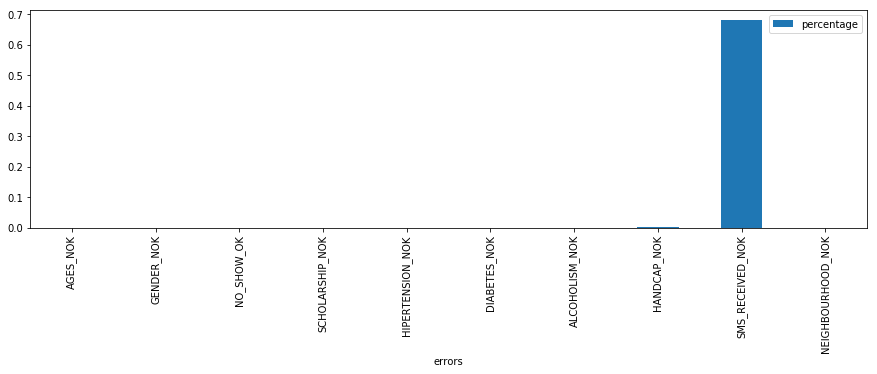

In [12]:
ERROS_VARS = ['AGES_NOK','GENDER_NOK','NO_SHOW_OK','SCHOLARSHIP_NOK',
              'HIPERTENSION_NOK','DIABETES_NOK','ALCOHOLISM_NOK',
              'HANDCAP_NOK','SMS_RECEIVED_NOK', 'NEIGHBOURHOOD_NOK']
errors_dict = [(name, len(df_appointments[eval(name)]) / len(df_appointments)) for name in ERROS_VARS]

df_errors = pd.DataFrame(errors_dict, columns=['errors','percentage'])
df_errors.set_index('errors', inplace=True)
df_errors.plot.bar(figsize=(15, 4))

### Analysis: 
SMS_RECEVED_NOK and HANDCAP_NOK present erros. No one of our questions take theses variables into account. So, we will remove theses two column from dataset.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [13]:
del df_appointments['Handcap']
del df_appointments['SMS_received']

df_appointments

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,No-show
AppointmentID,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,No
5642503,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,No
5642549,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,No
5642828,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,No
5642494,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,No
5626772,9.598513e+13,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,No
5630279,7.336882e+14,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,Yes
5630575,3.449833e+12,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,Yes
5638447,5.639473e+13,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

### **1)** Who are most missing out appointments are men or women?

In [14]:
df_Gender_No_Show = df_appointments[['Gender','No-show']]
df_F_M_No_Show = df_Gender_No_Show[df_Gender_No_Show['No-show'] == 'Yes']

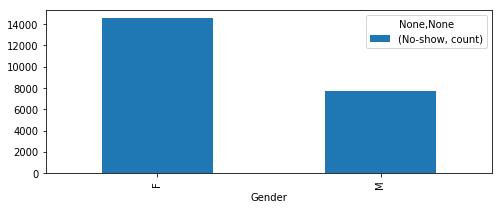

In [15]:
df_F_M_No_Show_group = df_F_M_No_Show.groupby(['Gender']).agg(['count'])
df_F_M_No_Show_group.plot.bar(figsize=(8, 3))

### Analysis:
Women don't show up for appoitments ~45% more times than Men.

### **2)** What is the proportion of patients don't show up for their appointments?

In [17]:
amount_patients_no_show = len(df_appointments[df_appointments['No-show'] == 'Yes'])
total = len(df_appointments)

proportion_no_show = amount_patients_no_show/total
print(proportion_no_show)

0.20193255946510807


### Analysis:
20% of the patients don't show up for their appointments. 

### **3)** What is the distribution of age of patients that don't show up for their appointments?

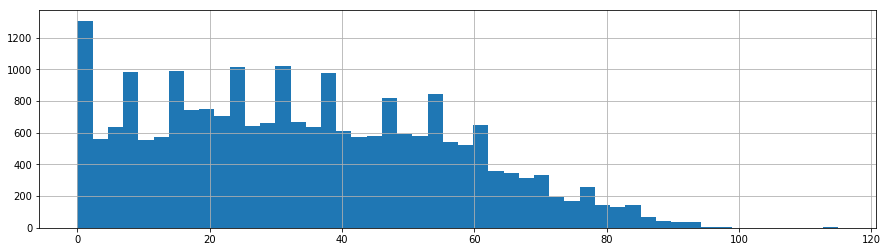

In [27]:
age_patients_no_show = df_appointments[df_appointments['No-show'] == 'Yes']
age_patients_no_show = age_patients_no_show[['Age','No-show']]
age_patients_no_show['Age'].hist(bins=50, figsize=(15, 4))

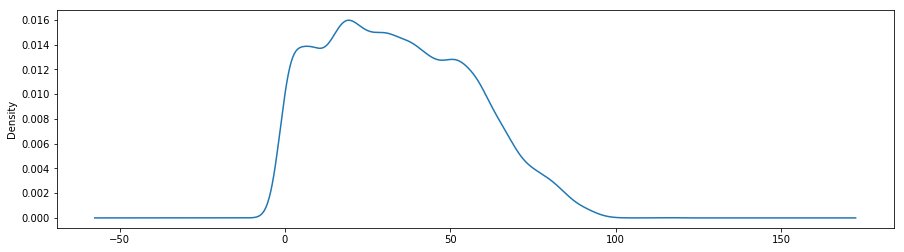

In [20]:
age_patients_no_show['Age'].plot.kde(figsize=(15, 4))

### Analysis:

* Young people and childen represents the range with more noncompliance appointments;
* As long as you getting older the chance to accomplish an appointments increases;
* There is some event each 4 years represents by peaks through the histogram.


### **4)** Is there any relation between desease and show up for an appointment?

In [28]:
df_desease_no_show = df_appointments[['Scholarship','Hipertension','Diabetes','Alcoholism','No-show']]
df_desease_no_show.is_copy = False
df_desease_no_show['No-show'] = df_desease_no_show['No-show'].map({'No': 0, 'Yes': 1})
df_desease_no_show.corr()

,Scholarship,Hipertension,Diabetes,Alcoholism,No-show
Scholarship,1.000000,-0.019729,-0.024894,0.035022,0.029135
Hipertension,-0.019729,1.000000,0.433086,0.087971,-0.035701
Diabetes,-0.024894,0.433086,1.000000,0.018474,-0.015180
Alcoholism,0.035022,0.087971,0.018474,1.000000,-0.000196
No-show,0.029135,-0.035701,-0.015180,-0.000196,1.000000


### Analysis:
Scholarship (welfair) and diseases as Hipertension, Diabetes and Alcoholism there is no correlation with show up for an appointment or don't.


### **5)** Where is the city with most no-show ups?

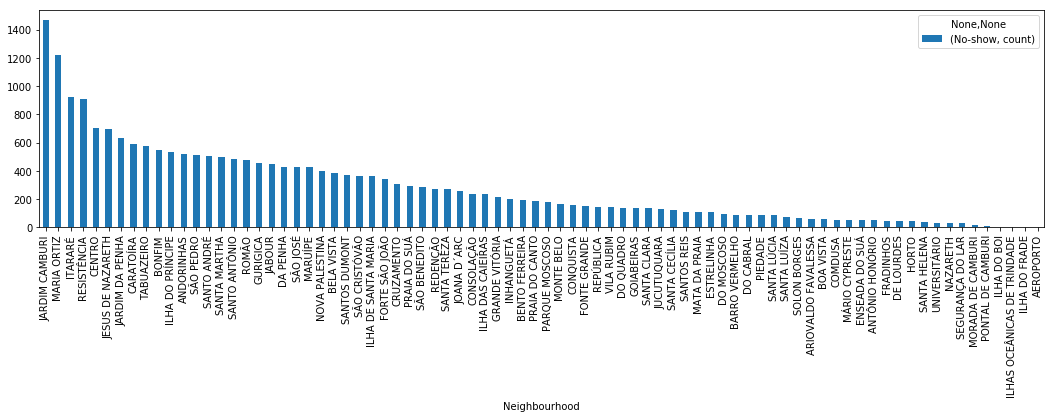

In [31]:
df_neigh_no_show = df_appointments[df_appointments['No-show'] == 'Yes']
df_neigh_no_show_only = df_neigh_no_show[['Neighbourhood','No-show']]
df_neigh_no_show_gp = df_neigh_no_show_only.groupby(['Neighbourhood']).agg(['count'])
df_neigh_no_show_gp = df_neigh_no_show_gp.sort_values(('No-show', 'count'), ascending=0)

df_neigh_no_show_gp.plot.bar(figsize=(18, 4))

### Analysis:
* The first 2 cities has 10% of all no-show cases;
* The 16 first cities has 50% of all no-show cases;
* Neighbourhood is a variable related with no-show up for an appointment.


### **6)** What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

We detect two important variables to predict No-show variable:
* **Neighbourhood**
* **Age**

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. It's also a good idea to look over the project rubric, found on the project submission page at the end of the lesson.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!

## Conclusions:

* Young people and childen represents the range with more noncompliance appointments;
* As long as you getting older the chance to accomplish an appointments increases;
* 20% of the patients don't show up for their appointments. 
* Women don't show up for appoitments ~45% more times than Men.
* There is some event each 4 years represents by peaks through the histogram.
* Scholarship (welfair) and diseases as Hipertension, Diabetes and Alcoholism there is no correlation with show up for an appointment or don't.
* Only Jardim Camburi and Maria Ortiz has together 10% of all no-show cases;
* Neighbourhood is a variable related with no-show up for an appointment.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])